In [1]:
! eups list -s lsst_distrib

   21.0.0-2-g8e5b5ee+0374c0674c 	w_latest current w_2021_21 setup


```
git clone https://github.com/Snyder005/mixcoatl.git 
cd mixcoatl/
git checkout -t remotes/origin/u/alex-broughton/dm_gridfittask
```

In [2]:
import sys
sys.path.append("/gpfs/slac/lsst/fs1/g/data/youtsumi/Spot/mixcoatl/python")

In [3]:
import numpy
import pylab as plt

# Stack imports
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.meas.extensions.shapeHSM
import lsst.afw.image as afwImage
from lsst.ip.isr.isrTask import IsrTask
from mixcoatl.characterizeSpots import CharacterizeSpotsTask
from mixcoatl.gridFitTask import GridFitTask

In [4]:
def display(exposure,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(10,10))
    afw_display = afwDisplay.Display(1)
    afw_display.scale('asinh', 'zscale')
    afw_display.mtv(exposure.getImage())
    plt.title(title)
    plt.gca().axis('off')

In [5]:
repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml"
butler = Butler(repo_path)

In [6]:
collections = 'LSSTCam/raw/all,u/youtsumi/calib/bias/run_6806D'.split(",")
print(collections)
butler = Butler(repo_path,collections=collections)
registry = butler.registry

['LSSTCam/raw/all', 'u/youtsumi/calib/bias/run_6806D']


You need to know which one has spot. According to the run log https://confluence.slac.stanford.edu/display/LSSTCAM/Nine+Science+and+Four+Corner+Raft+EO+Runs
it is said that R22_S11. So let's find the corresponding detector number by

In [18]:
! butler query-dimension-records  /sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft  detector | grep R22_S11


   LSSTCam  94   R22_S11          S11  R22   SCIENCE


94 is the detector number

1600


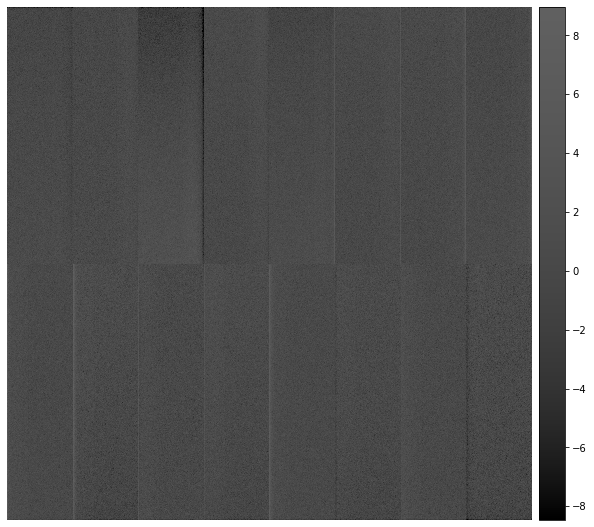

In [19]:
where = """
instrument='LSSTCam'
and exposure.observation_type = 'spot'
and exposure.science_program IN ('6864D')
and detector=94
"""

# and exposure.seq_num IN ( 1820, 1821, 1822 )
atyp="bias"
datasetRefs = list(registry.queryDatasets(
    datasetType=atyp,collections=collections,
    where = where
))
print(len(datasetRefs))
bias = butler.get(datasetRefs[0])
display(bias)
plt.show()

/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000363/raw_LSSTCam_unknown_MC_C_20191030_000363_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000363): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000363, ...} / 1600


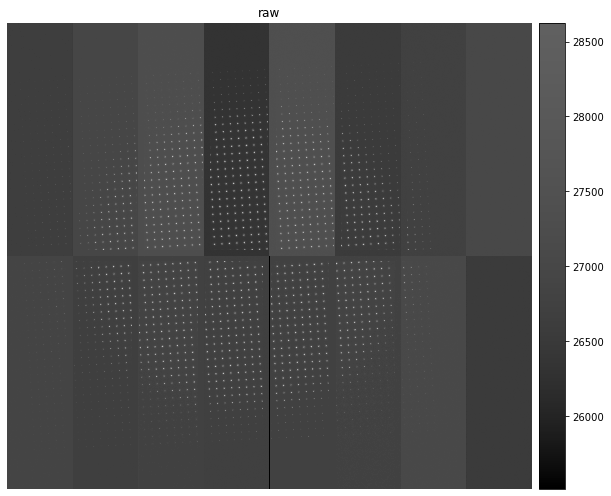

/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000364/raw_LSSTCam_unknown_MC_C_20191030_000364_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000364): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000364, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000365/raw_LSSTCam_unknown_MC_C_20191030_000365_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000365): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000365, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000366/raw_LSSTCam_unknown_MC_C_20191030_000366_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000366): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000366, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000367/raw_LSSTCam_unknown_MC_C_20191030_000367_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000367): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000367, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000368/raw_LSSTCam_unknown_MC_C_20191030_000368_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000368): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000368, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000369/raw_LSSTCam_unknown_MC_C_20191030_000369_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000369): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000369, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000370/raw_LSSTCam_unknown_MC_C_20191030_000370_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000370): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000370, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000371/raw_LSSTCam_unknown_MC_C_20191030_000371_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000371): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000371, ...} / 1600


/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/LSSTCam/raw/all/raw/20191030/MC_C_20191030_000372/raw_LSSTCam_unknown_MC_C_20191030_000372_R22_S11_LSSTCam_raw_all.fits(MC_C_20191030_000372): Unable to determine the filter


{instrument: 'LSSTCam', detector: 94, exposure: 3019103000372, ...} / 1600


In [21]:
atyp = "raw"
datasetRefs = list(registry.queryDatasets(
    datasetType=atyp,collections=collections,
    where = where
))

raws = []
for i in range(len(datasetRefs))[:10]:
    print(datasetRefs[i].dataId, "/", len(datasetRefs))
    raw = butler.get(datasetRefs[i])
    raws.append(raw)
    if i == 0:
        display(raw,atyp)
        plt.show()


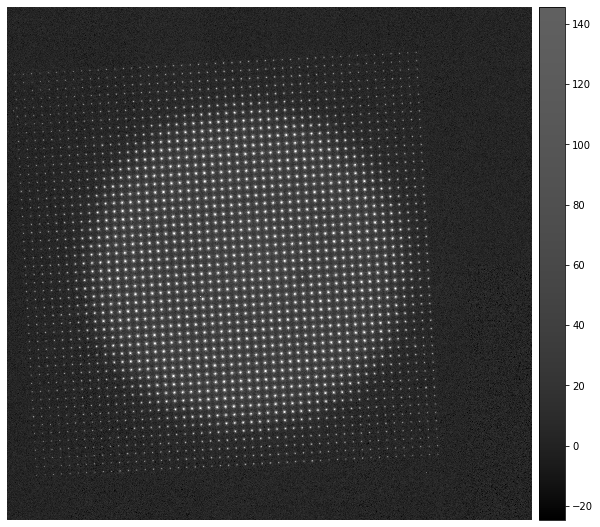

In [ ]:
isr = IsrTask()
isr.config.doLinearize=False
isr.config.doDark=False
isr.config.doFlat=False
isr.config.doDefect=False
postISRarr = []
gridSourceArr = []

for raw in raws:
    postISRCCD = isr.run(raw,bias=bias)
    postISRarr.append(postISRCCD)
    display(postISRCCD.exposure)
    plt.show()
    
    characterize = CharacterizeSpotsTask()
    #characterize.config.doMeasurePsf = False
    sourceCat = characterize.run(postISRCCD.exposure).sourceCat
    sourceCat = sourceCat.copy(deep=True)
    #sourceCat = characterize.run(postISRCCD.exposure).sourceCat
    ## Run GridFitTask
    gridfit = GridFitTask()
    gridSourceCat = gridfit.run(sourceCat, postISRCCD.exposure.getBBox()).gridSourceCat
    gridSourceArr.append(gridSourceCat)
    
    md = postISRCCD.exposure.getMetadata()
    gridSourceCat.getMetadata().combine(md)
    gridSourceCat.writeFits("out/{}.spots.fits".format(md["OBSID"]))    

In [ ]:
gridSourceArr = []
for postISRCCD in postISRarr:
    ## Run CharacterizeSpotsTask
    characterize = CharacterizeSpotsTask()
    #characterize.config.doMeasurePsf = False
    sourceCat = characterize.run(postISRCCD.exposure).sourceCat
    sourceCat = sourceCat.copy(deep=True)
    #sourceCat = characterize.run(postISRCCD.exposure).sourceCat
    ## Run GridFitTask
    gridfit = GridFitTask()
    gridSourceCat = gridfit.run(sourceCat, postISRCCD.exposure.getBBox()).gridSourceCat
    gridSourceArr.append(gridSourceCat)
    
    md = postISRCCD.exposure.getMetadata()
    gridSourceCat.getMetadata().combine(md)
    gridSourceCat.writeFits("out/{}.spots.fits".format(md["OBSID"]))

In [ ]:
display(postISRarr[0].exposure)
for cat, x, y, sym in [
    (gridSourceCat, "spotgrid_x", "spotgrid_y", "o" ),
    (sourceCat, "base_SdssCentroid_x", "base_SdssCentroid_y", "x")
    ]:
    plt.title("spot")
    plt.plot(cat.asAstropy()[x],cat.asAstropy()[y],sym)


In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(sourceCat["base_SdssShape_xx"],sourceCat["base_SdssShape_yy"],"o")
plt.axvspan(0,0.1,alpha=0.1)
plt.axvspan(50,100,alpha=0.1)
plt.axhspan(0,0.1,alpha=0.1)
plt.axhspan(50,100,alpha=0.1)
plt.xlabel("base_SdssShape_xx")
plt.ylabel("base_SdssShape_yy")
plt.xlim(0,100)
plt.ylim(0,100)

In [ ]:
gridSourceArr[0].asAstropy().colnames

In [ ]:
from astropy.table import join
joined = join(gridSourceArr[0].asAstropy(),gridSourceArr[1].asAstropy(),keys=["spotgrid_index"])

In [ ]:
scale =5
fig = plt.figure(figsize=(10,10))
dx = (joined["spotgrid_x_2"]-joined["spotgrid_x_1"])
dy = (joined["spotgrid_y_2"]-joined["spotgrid_y_1"])
plt.quiver(
    joined["spotgrid_x_1"],
    joined["spotgrid_y_1"],
    dx - numpy.nanmean(dx),
    dy - numpy.nanmean(dy),
    scale = scale,
    angles = "xy",
#    width = .1
)
plt.title( "Displacement of spots, subtracting off the mean shift" )
print( numpy.nanmean([dx,dy],axis=1))